In [217]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
pd.set_option("display.max_columns",None)

In [218]:
data = pd.read_csv("houseprice.csv")

In [219]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [220]:
X = data.drop(labels=["SalePrice", "Id"], axis = 1)
y = data["SalePrice"]

In [221]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,N

In [222]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [223]:
X.isnull().mean().sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
Heating          0.000000
MSZoning         0.000000
CentralAir       0.000000
1stFlrSF         0.000000
SaleCondition    0.000000
Length: 79, dtype: float64

In [224]:
def draw_overal(df, variable):
    plt.figure(figsize= (16,4))
    
    plt.subplot(1,3,1)
    sns.histplot(df[variable], kde=True)
    
    plt.subplot(1,3,2)
    stats.probplot(df[variable].dropna(),dist="norm", plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(df[variable])
    
    plt.show()

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


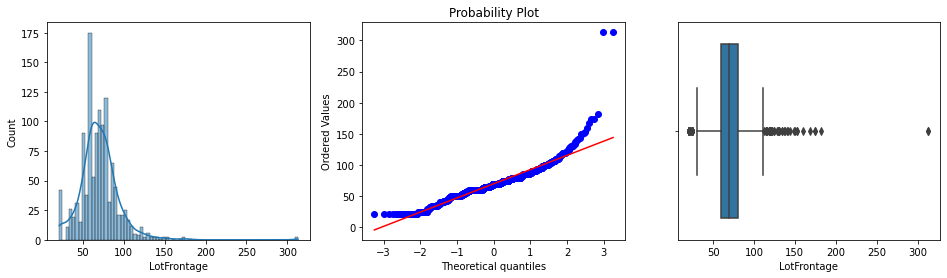

In [225]:
draw_overal(X, "LotFrontage")

In [226]:
numerical = [x for x in X.columns if X[x].dtypes != "O"]
categorical = [x for x in X.columns if X[x].dtypes == "O"]

In [227]:
numerical[1:5]

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


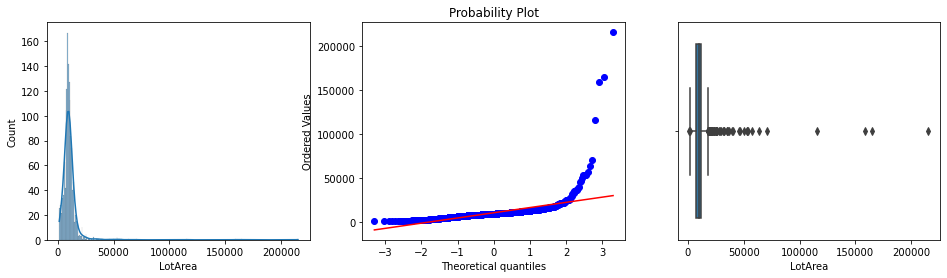

In [228]:
draw_overal(X,"LotArea")

<AxesSubplot:>

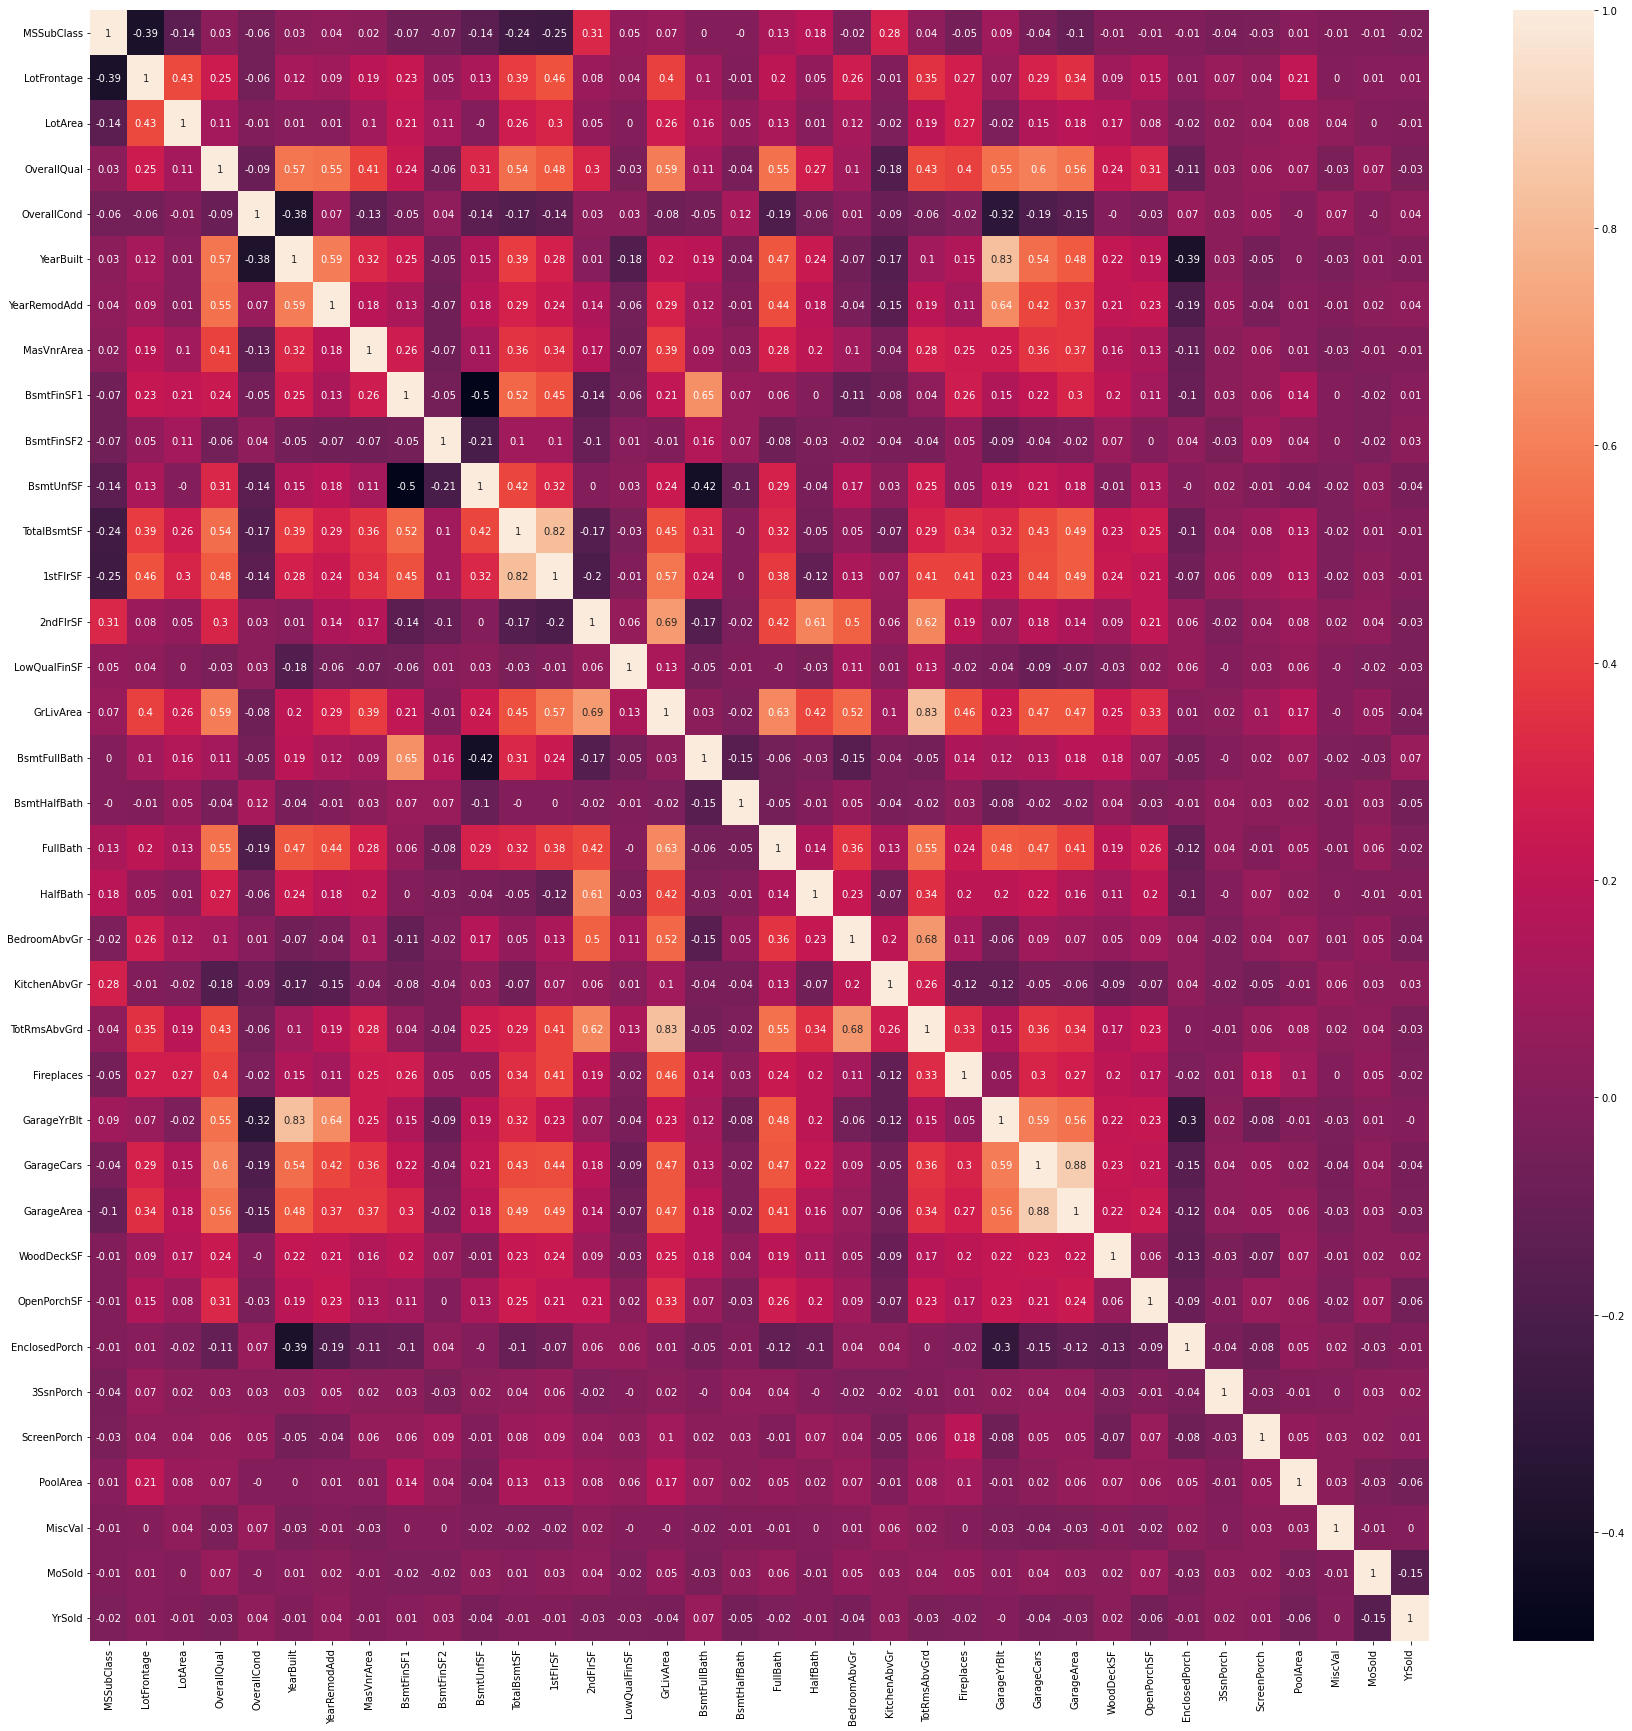

In [229]:
matrix_corr = X.corr().round(2)
plt.subplots(figsize=(30,30))
sns.heatmap(matrix_corr,annot=True)

In [230]:
X["LotFrontage"].isnull().sum()

259

In [231]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [232]:
X.loc[X["LotFrontage"].isnull(),"LotFrontage"]

7      NaN
12     NaN
14     NaN
16     NaN
24     NaN
        ..
1429   NaN
1431   NaN
1441   NaN
1443   NaN
1446   NaN
Name: LotFrontage, Length: 259, dtype: float64

In [110]:
X_nomissing = X.copy()

In [233]:
X_nomissing.shape

(1460, 79)

In [234]:
# fill none
missing_cols_group1 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 
                       'FireplaceQu', 'MSSubClass', 'GarageType', 
                       'GarageFinish', 'GarageQual', 'GarageCond',"MasVnrType"]
# fill 0
missing_cols_group3 = ['GarageYrBlt', 'GarageArea', 'GarageCars', 
                       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',"MasVnrArea"]
# fill none
missing_cols_group4 = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
# fill mode
missing_cols_group5 = ['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities',"MSZoning"]



In [235]:
labels = missing_cols_group1 + missing_cols_group3  + missing_cols_group4 + missing_cols_group5

In [236]:
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

missing_hanlde = ColumnTransformer(transformers=[
    ("group1", SimpleImputer(strategy="constant", fill_value="None"), missing_cols_group1),
    ("group3", SimpleImputer(strategy="constant", fill_value=0), missing_cols_group3),
    ("group4", SimpleImputer(strategy="constant", fill_value="None"), missing_cols_group4),
    ("group5", SimpleImputer(strategy="most_frequent"),missing_cols_group5)
])

In [237]:
X_nomissing["LotFrontage"] = X_nomissing.groupby(["Neighborhood"])["LotFrontage"].transform(lambda x : x.fillna(x.median()))

In [238]:
X_nomissing["LotFrontage"].isnull().sum()

0

In [239]:
missing_hanlde.fit(X_nomissing)

ColumnTransformer(transformers=[('group1',
                                 SimpleImputer(fill_value='None',
                                               strategy='constant'),
                                 ['PoolQC', 'MiscFeature', 'Alley', 'Fence',
                                  'FireplaceQu', 'MSSubClass', 'GarageType',
                                  'GarageFinish', 'GarageQual', 'GarageCond',
                                  'MasVnrType']),
                                ('group3',
                                 SimpleImputer(fill_value=0,
                                               strategy='constant'),
                                 ['GarageYrBlt', 'GarageArea', 'GarageCars',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                                  'MasVnrArea']),
                                ('group4',
                                 SimpleIm

In [240]:
X_nomissing = missing_hanlde.transform(X_nomissing)

In [241]:
X_nomissing = pd.DataFrame(X_nomissing, columns = labels)

In [242]:
X_nomissing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PoolQC        1460 non-null   object
 1   MiscFeature   1460 non-null   object
 2   Alley         1460 non-null   object
 3   Fence         1460 non-null   object
 4   FireplaceQu   1460 non-null   object
 5   MSSubClass    1460 non-null   object
 6   GarageType    1460 non-null   object
 7   GarageFinish  1460 non-null   object
 8   GarageQual    1460 non-null   object
 9   GarageCond    1460 non-null   object
 10  MasVnrType    1460 non-null   object
 11  GarageYrBlt   1460 non-null   object
 12  GarageArea    1460 non-null   object
 13  GarageCars    1460 non-null   object
 14  BsmtFinSF1    1460 non-null   object
 15  BsmtFinSF2    1460 non-null   object
 16  BsmtUnfSF     1460 non-null   object
 17  TotalBsmtSF   1460 non-null   object
 18  BsmtFullBath  1460 non-null   object
 19  BsmtHa

In [243]:
non_labels = list(set(X.columns) - set(labels))

In [244]:
X_nomissing.shape

(1460, 33)

In [245]:
tmp = pd.concat([X_nomissing, X[non_labels]], axis=1)
tmp["LotFrontage"] = tmp.groupby(["Neighborhood"])["LotFrontage"].transform(lambda x : x.fillna(x.median()))


In [246]:
tmp["LotFrontage"].isnull().sum()

0

In [260]:
X_nomissing_2 = tmp.copy()

In [261]:
labels_columns_0 = ['OverallQual', 'OverallCond']

In [262]:
X_nomissing_2["OverallQual"]

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [263]:
X_nomissing_2["OverallQual"].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [264]:
set([4,3,2,1]) - set([2,1])

{3, 4}

In [265]:
fake_nummeric_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'YrSold', 'MoSold']
## PUT YOUR CODE HERE:
# Đổi định dạng của các đặc trưng số sang định dạng chuỗi (string)
for col in fake_nummeric_cols:
    X_nomissing_2[col] = X_nomissing_2[col].astype(str)

In [266]:
X_nomissing_2["OverallQual"].unique()

array(['7', '6', '8', '5', '9', '4', '10', '3', '1', '2'], dtype=object)

In [267]:
l = ["0","1","2","3","4","5","6","7","8","9","10"]
dict_label = { k: i for i, k in enumerate(l)}

In [268]:
dict_label

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '10': 10}

In [269]:
labels_columns_0 = ['OverallQual', 'OverallCond']
for col in labels_columns_0:
    X_nomissing_2[col] = X_nomissing_2[col].map(dict_label)
    
X_nomissing_2[labels_columns_0].head()

,OverallQual,OverallCond
0,7,5
1,6,8
2,7,5
3,7,5
4,8,5


In [270]:
temp = X_nomissing_2.copy()

In [271]:
def label_encoding(x,labels):
    return labels.index(x)

In [272]:
labels_1 = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
labels_columns_1 = ['BsmtQual', 'BsmtCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'PoolQC']

## PUT YOUR CODE HERE:
# mã hóa số nguyên bằng cách sử dụng hàm label_encoding
for col in labels_columns_1:
    X_nomissing_2[col] = X_nomissing_2[col].apply(lambda x:label_encoding(x, labels_1))

X_nomissing_2[labels_columns_1].head()

,BsmtQual,BsmtCond,ExterQual,ExterCond,HeatingQC,KitchenQual,PoolQC
0,4,3,4,3,5,4,0
1,4,3,3,3,5,3,0
2,4,3,4,3,5,4,0
3,3,4,3,3,4,4,0
4,4,3,4,3,5,4,0


In [273]:
labels_2 = ['None', 'No', 'Mn', 'Av', 'Gd']
labels_columns_2 = ['BsmtExposure']

## PUT YOUR CODE HERE:
# mã hóa số nguyên bằng cách sử dụng hàm label_encoding
for col in labels_columns_2:
    X_nomissing_2[col] = X_nomissing_2[col].apply(lambda x:label_encoding(x,labels_2))
    
X_nomissing_2[labels_columns_2].head()

,BsmtExposure
0,1
1,4
2,2
3,1
4,3


In [274]:
labels_3 = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
labels_columns_3 = ['BsmtFinType1', 'BsmtFinType2']

## PUT YOUR CODE HERE:
# mã hóa số nguyên bằng cách sử dụng hàm label_encoding
for col in labels_columns_3:
    X_nomissing_2[col] = X_nomissing_2[col].apply(lambda x:label_encoding(x,labels_3))
    
X_nomissing_2[labels_columns_3].head()

,BsmtFinType1,BsmtFinType2
0,6,1
1,5,1
2,6,1
3,5,1
4,6,1


In [275]:
labels_4 = ['N', 'Y']
labels_columns_4 = ['CentralAir']

labels_5 = ['None', 'Unf', 'RFn', 'Fin']
labels_columns_5 = ['GarageFinish']

labels_6 = ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
labels_columns_6 = ['Fence']

## PUT YOUR CODE HERE:
# mã hóa số nguyên bằng cách sử dụng hàm label_encoding

for col in labels_columns_5:
    X_nomissing_2[col] = X_nomissing_2[col].apply(lambda x:label_encoding(x,labels_5))
    
for col in labels_columns_6:
    X_nomissing_2[col] = X_nomissing_2[col].apply(lambda x:label_encoding(x,labels_6))
    
X_nomissing_2[labels_columns_4 + labels_columns_5 + labels_columns_6].head()

,CentralAir,GarageFinish,Fence
0,Y,2,0
1,Y,2,0
2,Y,2,0
3,Y,1,0
4,Y,2,0


In [276]:
X_nomissing_2["CentralAir"].unique()

array(['Y', 'N'], dtype=object)

In [277]:
label_cols = labels_columns_0 + labels_columns_1 + labels_columns_2 + labels_columns_3 + labels_columns_4 + labels_columns_5 + labels_columns_6
label_cols

['OverallQual',
 'OverallCond',
 'BsmtQual',
 'BsmtCond',
 'ExterQual',
 'ExterCond',
 'HeatingQC',
 'KitchenQual',
 'PoolQC',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'CentralAir',
 'GarageFinish',
 'Fence']

In [280]:
label_cols = labels_columns_0 + labels_columns_1 + labels_columns_2 + labels_columns_3 + labels_columns_4 + labels_columns_5 + labels_columns_6
label_cols
X_3 = X_nomissing_2.copy()

In [281]:
## PUT YOUR CODE HERE:
# Tách riêng các cột không chứa các đặc trưng đã được mã hóa số nguyên
number_categorical_cols = [col for col in X_nomissing_2.columns if col not in label_cols] 
number_cols = [col for col in number_categorical_cols if X_3[col].dtype=='int64' or X_3[col].dtype=='float64'] # Numerical

In [282]:
categorical_cols=[col for col in number_categorical_cols  if X_3[col].dtype=='object']

In [283]:
len(categorical_cols)

43

In [362]:
from sklearn.preprocessing import OneHotEncoder
ohd = OneHotEncoder(drop="first",handle_unknown="ignore")
ohd.fit(X_3[categorical])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [363]:
tmp = ohd.transform(X_3[categorical])

In [654]:
X_3[categorical]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,1,6,1,GasA,5,Y,SBrkr,4,Typ,None,Attchd,2,TA,TA,Y,0,0,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,3,3,CBlock,4,3,4,5,1,GasA,5,Y,SBrkr,3,Typ,TA,Attchd,2,TA,TA,Y,0,0,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,2,6,1,GasA,5,Y,SBrkr,4,Typ,TA,Attchd,2,TA,TA,Y,0,0,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,3,3,BrkTil,3,4,1,5,1,GasA,4,Y,SBrkr,4,Typ,Gd,Detchd,1,TA,TA,Y,0,0,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,3,6,1,GasA,5,Y,SBrkr,4,Typ,TA,Attchd,2,TA,TA,Y,0,0,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,3,3,PConc,4,3,1,1,1,GasA,5,Y,SBrkr,3,Typ,TA,Attchd,2,TA,TA,Y,0,0,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,3,3,CBlock,4,3,1,5,3,GasA,3,Y,SBrkr,3,Min1,TA,Attchd,1,TA,TA,Y,0,3,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,5,4,Stone,3,4,1,6,1,GasA,5,Y,SBrkr,4,Typ,Gd,Attchd,2,TA,TA,Y,0,4,Shed,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,3,3,CBlock,3,3,2,6,3,GasA,4,Y,FuseA,4,Typ,None,Attchd,1,TA,TA,Y,0,0,None,WD,Normal


In [348]:
dummy = pd.DataFrame(tmp.toarray(),columns=ohd.get_feature_names())

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [349]:
dummy

,x0_FV,x0_RH,x0_RL,x0_RM,x1_Pave,x2_None,x2_Pave,x3_IR2,x3_IR3,x3_Reg,x4_HLS,x4_Low,x4_Lvl,x5_NoSeWa,x6_CulDSac,x6_FR2,x6_FR3,x6_Inside,x7_Mod,x7_Sev,x8_Blueste,x8_BrDale,x8_BrkSide,x8_ClearCr,x8_CollgCr,x8_Crawfor,x8_Edwards,x8_Gilbert,x8_IDOTRR,x8_MeadowV,x8_Mitchel,x8_NAmes,x8_NPkVill,x8_NWAmes,x8_NoRidge,x8_NridgHt,x8_OldTown,x8_SWISU,x8_Sawyer,x8_SawyerW,x8_Somerst,x8_StoneBr,x8_Timber,x8_Veenker,x9_Feedr,x9_Norm,x9_PosA,x9_PosN,x9_RRAe,x9_RRAn,x9_RRNe,x9_RRNn,x10_Feedr,x10_Norm,x10_PosA,x10_PosN,x10_RRAe,x10_RRAn,x10_RRNn,x11_2fmCon,x11_Duplex,x11_Twnhs,x11_TwnhsE,x12_1.5Unf,x12_1Story,x12_2.5Fin,x12_2.5Unf,x12_2Story,x12_SFoyer,x12_SLvl,x13_Gable,x13_Gambrel,x13_Hip,x13_Mansard,x13_Shed,x14_CompShg,x14_Membran,x14_Metal,x14_Roll,x14_Tar&Grv,x14_WdShake,x14_WdShngl,x15_AsphShn,x15_BrkComm,x15_BrkFace,x15_CBlock,x15_CemntBd,x15_HdBoard,x15_ImStucc,x15_MetalSd,x15_Plywood,x15_Stone,x15_Stucco,x15_VinylSd,x15_Wd Sdng,x15_WdShing,x16_AsphShn,x16_Brk Cmn,x16_BrkFace,x16_CBlock,x16_CmentBd,x16_HdBoard,x16_ImStucc,x16_MetalSd,x16_Other,x16_Plywood,x16_Stone,x16_Stucco,x16_VinylSd,x16_Wd Sdng,x16_Wd Shng,x17_BrkFace,x17_None,x17_Stone,x18_3,x18_4,x18_5,x19_2,x19_3,x19_4,x19_5,x20_CBlock,x20_PConc,x20_Slab,x20_Stone,x20_Wood,x21_2,x21_3,x21_4,x21_5,x22_1,x22_2,x22_3,x22_4,x23_1,x23_2,x23_3,x23_4,x24_1,x24_2,x24_3,x24_4,x24_5,x24_6,x25_1,x25_2,x25_3,x25_4,x25_5,x25_6,x26_GasA,x26_GasW,x26_Grav,x26_OthW,x26_Wall,x27_2,x27_3,x27_4,x27_5,x28_Y,x29_FuseF,x29_FuseP,x29_Mix,x29_SBrkr,x30_3,x30_4,x30_5,x31_Maj2,x31_Min1,x31_Min2,x31_Mod,x31_Sev,x31_Typ,x32_Fa,x32_Gd,x32_None,x32_Po,x32_TA,x33_Attchd,x33_Basment,x33_BuiltIn,x33_CarPort,x33_Detchd,x33_None,x34_1,x34_2,x34_3,x35_Fa,x35_Gd,x35_None,x35_Po,x35_TA,x36_Fa,x36_Gd,x36_None,x36_Po,x36_TA,x37_P,x37_Y,x38_2,x38_4,x38_5,x39_1,x39_2,x39_3,x39_4,x40_None,x40_Othr,x40_Shed,x40_TenC,x41_CWD,x41_Con,x41_ConLD,x41_ConLI,x41_ConLw,x41_New,x41_Oth,x41_WD,x42_AdjLand,x42_Alloca,x42_Family,x42_Normal,x42_Partial
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [287]:
X_4 = pd.concat([X_3[number_cols ],dummy], axis=1)

In [288]:
X_4

,GrLivArea,TotRmsAbvGrd,3SsnPorch,YearBuilt,PoolArea,EnclosedPorch,YearRemodAdd,WoodDeckSF,KitchenAbvGr,BedroomAbvGr,MiscVal,FullBath,LotArea,2ndFlrSF,OpenPorchSF,LowQualFinSF,LotFrontage,ScreenPorch,HalfBath,1stFlrSF,Fireplaces,x0_FV,x0_RH,x0_RL,x0_RM,x1_Pave,x2_None,x2_Pave,x3_IR2,x3_IR3,x3_Reg,x4_HLS,x4_Low,x4_Lvl,x5_NoSeWa,x6_CulDSac,x6_FR2,x6_FR3,x6_Inside,x7_Mod,x7_Sev,x8_Blueste,x8_BrDale,x8_BrkSide,x8_ClearCr,x8_CollgCr,x8_Crawfor,x8_Edwards,x8_Gilbert,x8_IDOTRR,x8_MeadowV,x8_Mitchel,x8_NAmes,x8_NPkVill,x8_NWAmes,x8_NoRidge,x8_NridgHt,x8_OldTown,x8_SWISU,x8_Sawyer,x8_SawyerW,x8_Somerst,x8_StoneBr,x8_Timber,x8_Veenker,x9_Feedr,x9_Norm,x9_PosA,x9_PosN,x9_RRAe,x9_RRAn,x9_RRNe,x9_RRNn,x10_Feedr,x10_Norm,x10_PosA,x10_PosN,x10_RRAe,x10_RRAn,x10_RRNn,x11_2fmCon,x11_Duplex,x11_Twnhs,x11_TwnhsE,x12_1.5Unf,x12_1Story,x12_2.5Fin,x12_2.5Unf,x12_2Story,x12_SFoyer,x12_SLvl,x13_Gable,x13_Gambrel,x13_Hip,x13_Mansard,x13_Shed,x14_CompShg,x14_Membran,x14_Metal,x14_Roll,x14_Tar&Grv,x14_WdShake,x14_WdShngl,x15_AsphShn,x15_BrkComm,x15_BrkFace,x15_CBlock,x15_CemntBd,x15_HdBoard,x15_ImStucc,x15_MetalSd,x15_Plywood,x15_Stone,x15_Stucco,x15_VinylSd,x15_Wd Sdng,x15_WdShing,x16_AsphShn,x16_Brk Cmn,x16_BrkFace,x16_CBlock,x16_CmentBd,x16_HdBoard,x16_ImStucc,x16_MetalSd,x16_Other,x16_Plywood,x16_Stone,x16_Stucco,x16_VinylSd,x16_Wd Sdng,x16_Wd Shng,x17_BrkFace,x17_None,x17_Stone,x18_3,x18_4,x18_5,x19_2,x19_3,x19_4,x19_5,x20_CBlock,x20_PConc,x20_Slab,x20_Stone,x20_Wood,x21_2,x21_3,x21_4,x21_5,x22_1,x22_2,x22_3,x22_4,x23_1,x23_2,x23_3,x23_4,x24_1,x24_2,x24_3,x24_4,x24_5,x24_6,x25_1,x25_2,x25_3,x25_4,x25_5,x25_6,x26_GasA,x26_GasW,x26_Grav,x26_OthW,x26_Wall,x27_2,x27_3,x27_4,x27_5,x28_Y,x29_FuseF,x29_FuseP,x29_Mix,x29_SBrkr,x30_3,x30_4,x30_5,x31_Maj2,x31_Min1,x31_Min2,x31_Mod,x31_Sev,x31_Typ,x32_Fa,x32_Gd,x32_None,x32_Po,x32_TA,x33_Attchd,x33_Basment,x33_BuiltIn,x33_CarPort,x33_Detchd,x33_None,x34_1,x34_2,x34_3,x35_Fa,x35_Gd,x35_None,x35_Po,x35_TA,x36_Fa,x36_Gd,x36_None,x36_Po,x36_TA,x37_P,x37_Y,x38_2,x38_4,x38_5,x39_1,x39_2,x39_3,x39_4,x40_None,x40_Othr,x40_Shed,x40_TenC,x41_CWD,x41_Con,x41_ConLD,x41_ConLI,x41_ConLw,x41_New,x41_Oth,x41_WD,x42_AdjLand,x42_Alloca,x42_Family,x42_Normal,x42_Partial
0,1710,8,0,2003,0,0,2003,0,1,3,0,2,8450,854,61,0,65.0,0,1,856,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1262,6,0,1976,0,0,1976,298,1,3,0,2,9600,0,0,0,80.0,0,0,1262,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,

In [289]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_4[number_cols])

StandardScaler()

In [290]:
X_4[number_cols]=sc.transform(X_4[number_cols])

In [291]:
from feature_engine.selection import DropDuplicateFeatures
sel = DropDuplicateFeatures()
sel.fit(X_4)
X_5 = sel.transform(X_4)

DropDuplicateFeatures()

In [61]:
sel.features_to_drop_

{'x16_CBlock', 'x35_None', 'x36_None'}

In [292]:
X_5 = sel.transform(X_4)

In [293]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV


In [294]:
X_5.head()

,GrLivArea,TotRmsAbvGrd,3SsnPorch,YearBuilt,PoolArea,EnclosedPorch,YearRemodAdd,WoodDeckSF,KitchenAbvGr,BedroomAbvGr,MiscVal,FullBath,LotArea,2ndFlrSF,OpenPorchSF,LowQualFinSF,LotFrontage,ScreenPorch,HalfBath,1stFlrSF,Fireplaces,x0_FV,x0_RH,x0_RL,x0_RM,x1_Pave,x2_None,x2_Pave,x3_IR2,x3_IR3,x3_Reg,x4_HLS,x4_Low,x4_Lvl,x5_NoSeWa,x6_CulDSac,x6_FR2,x6_FR3,x6_Inside,x7_Mod,x7_Sev,x8_Blueste,x8_BrDale,x8_BrkSide,x8_ClearCr,x8_CollgCr,x8_Crawfor,x8_Edwards,x8_Gilbert,x8_IDOTRR,x8_MeadowV,x8_Mitchel,x8_NAmes,x8_NPkVill,x8_NWAmes,x8_NoRidge,x8_NridgHt,x8_OldTown,x8_SWISU,x8_Sawyer,x8_SawyerW,x8_Somerst,x8_StoneBr,x8_Timber,x8_Veenker,x9_Feedr,x9_Norm,x9_PosA,x9_PosN,x9_RRAe,x9_RRAn,x9_RRNe,x9_RRNn,x10_Feedr,x10_Norm,x10_PosA,x10_PosN,x10_RRAe,x10_RRAn,x10_RRNn,x11_2fmCon,x11_Duplex,x11_Twnhs,x11_TwnhsE,x12_1.5Unf,x12_1Story,x12_2.5Fin,x12_2.5Unf,x12_2Story,x12_SFoyer,x12_SLvl,x13_Gable,x13_Gambrel,x13_Hip,x13_Mansard,x13_Shed,x14_CompShg,x14_Membran,x14_Metal,x14_Roll,x14_Tar&Grv,x14_WdShake,x14_WdShngl,x15_AsphShn,x15_BrkComm,x15_BrkFace,x15_CBlock,x15_CemntBd,x15_HdBoard,x15_ImStucc,x15_MetalSd,x15_Plywood,x15_Stone,x15_Stucco,x15_VinylSd,x15_Wd Sdng,x15_WdShing,x16_AsphShn,x16_Brk Cmn,x16_BrkFace,x16_CmentBd,x16_HdBoard,x16_ImStucc,x16_MetalSd,x16_Other,x16_Plywood,x16_Stone,x16_Stucco,x16_VinylSd,x16_Wd Sdng,x16_Wd Shng,x17_BrkFace,x17_None,x17_Stone,x18_3,x18_4,x18_5,x19_2,x19_3,x19_4,x19_5,x20_CBlock,x20_PConc,x20_Slab,x20_Stone,x20_Wood,x21_2,x21_3,x21_4,x21_5,x22_1,x22_2,x22_3,x22_4,x23_1,x23_2,x23_3,x23_4,x24_1,x24_2,x24_3,x24_4,x24_5,x24_6,x25_1,x25_2,x25_3,x25_4,x25_5,x25_6,x26_GasA,x26_GasW,x26_Grav,x26_OthW,x26_Wall,x27_2,x27_3,x27_4,x27_5,x28_Y,x29_FuseF,x29_FuseP,x29_Mix,x29_SBrkr,x30_3,x30_4,x30_5,x31_Maj2,x31_Min1,x31_Min2,x31_Mod,x31_Sev,x31_Typ,x32_Fa,x32_Gd,x32_None,x32_Po,x32_TA,x33_Attchd,x33_Basment,x33_BuiltIn,x33_CarPort,x33_Detchd,x33_None,x34_1,x34_2,x34_3,x35_Fa,x35_Gd,x35_Po,x35_TA,x36_Fa,x36_Gd,x36_Po,x36_TA,x37_P,x37_Y,x38_2,x38_4,x38_5,x39_1,x39_2,x39_3,x39_4,x40_None,x40_Othr,x40_Shed,x40_TenC,x41_CWD,x41_Con,x41_ConLD,x41_ConLI,x41_ConLw,x41_New,x41_Oth,x41_WD,x42_AdjLand,x42_Alloca,x42_Family,x42_Normal,x42_Partial
0,0.370333,0.912210,-0.116339,1.050994,-0.068692,-0.359325,0.878668,-0.752176,-0.211454,0.163779,-0.087688,0.789741,-0.207142,1.161852,0.216503,-0.120242,-0.231877,-0.270208,1.227585,-0.793434,-0.951226,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.482512,-0.318683,-0.116339,0.156734,-0.068692,-0.359325,-0.429577,1.626195,-0.211454,0.163779,-0.087688,0.789741,-0.091886,-0.795163,-0.704483,-0.120242,0.437043,-0.270208,-0.761621,0.257140,0.600495,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0

In [295]:
para = {"alpha" : [0.1, 1, 10, 100]}
clf = GridSearchCV(Lasso(), para, scoring="neg_mean_squared_error")
clf.fit(X_5,y)


/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.777e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.214e+11, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

GridSearchCV(estimator=Lasso(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [296]:
clf.best_estimator_

Lasso(alpha=100)

In [297]:
sel =SelectFromModel(Lasso(alpha=100))

In [298]:
sel.fit(X_5, y)

SelectFromModel(estimator=Lasso(alpha=100))

In [299]:
selected = X_5.columns[sel.get_support()]

In [300]:
selected

Index(['GrLivArea', 'TotRmsAbvGrd', '3SsnPorch', 'YearBuilt', 'PoolArea',
       'EnclosedPorch', 'YearRemodAdd', 'WoodDeckSF', 'KitchenAbvGr',
       'BedroomAbvGr',
       ...
       'x34_3', 'x35_Fa', 'x35_Gd', 'x36_TA', 'x38_4', 'x38_5', 'x39_3',
       'x41_New', 'x41_WD', 'x42_Normal'],
      dtype='object', length=102)

In [301]:
X_6 = X_5[selected]

In [302]:
from sklearn.linear_model import Ridge
ri = Ridge()
ri.fit(X_6,y)

y_pred = ri.predict(X_6)


In [303]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y,squared=False)

25864.38652649749

In [304]:
y_pred

array([205641.33407415, 193349.56023578, 211769.75622874, ...,
       274564.9887783 , 154626.57783238, 147027.46769227])

In [305]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

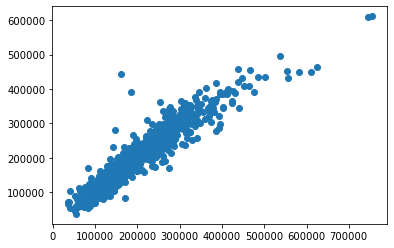

In [306]:
plt.scatter(y, y_pred)

In [618]:
import pickle
pickle.dump(ri,open("model.pkl","wb"))

In [619]:
vec = open("model.pkl","rb")
model = pickle.load(vec)

In [620]:
data = pd.read_csv("test.csv")

In [621]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [622]:
data.shape

(1459, 80)

In [623]:
X_test = data.drop(["Id"], axis=1)

In [624]:
X_test.shape

(1459, 79)

In [625]:
X_test["LotFrontage"]  = X.groupby(["Neighborhood"])["LotFrontage"].transform(lambda x : x.fillna(x.median))

In [626]:
X_test_2= missing_hanlde.transform(X_test)

In [627]:
X_test_3 = pd.DataFrame(X_test_2, columns = labels)

In [628]:
X_test_3

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,MSSubClass,GarageType,GarageFinish,GarageQual,GarageCond,MasVnrType,GarageYrBlt,GarageArea,GarageCars,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,KitchenQual,Exterior1st,Exterior2nd,SaleType,Utilities,MSZoning
0,None,None,None,MnPrv,None,20,Attchd,Unf,TA,TA,None,1961.0,730.0,1.0,468.0,144.0,270.0,882.0,0.0,0.0,0.0,TA,TA,No,Rec,LwQ,SBrkr,TA,VinylSd,VinylSd,WD,AllPub,RH
1,None,Gar2,None,None,None,20,Attchd,Unf,TA,TA,BrkFace,1958.0,312.0,1.0,923.0,0.0,406.0,1329.0,0.0,0.0,108.0,TA,TA,No,ALQ,Unf,SBrkr,Gd,Wd Sdng,Wd Sdng,WD,AllPub,RL
2,None,None,None,MnPrv,TA,60,Attchd,Fin,TA,TA,None,1997.0,482.0,2.0,791.0,0.0,137.0,928.0,0.0,0.0,0.0,Gd,TA,No,GLQ,Unf,SBrkr,TA,VinylSd,VinylSd,WD,AllPub,RL
3,None,None,None,None,Gd,60,Attchd,Fin,TA,TA,BrkFace,1998.0,470.0,2.0,602.0,0.0,324.0,926.0,0.0,0.0,20.0,TA,TA,No,GLQ,Unf,SBrkr,Gd,VinylSd,VinylSd,WD,AllPub,RL
4,None,None,None,None,None,120,Attchd,RFn,TA,TA,None,1992.0,506.0,2.0,263.0,0.0,1017.0,1280.0,0.0,0.0,0.0,Gd,TA,No,ALQ,Unf,SBrkr,Gd,HdBoard,HdBoard,WD,AllPub,RL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,None,None,None,None,None,160,None,None,None,None,None,0.0,0.0,0.0,0.0,0.0,546.0,546.0,0.0,0.0,0.0,TA,TA,No,Unf,Unf,SBrkr,TA,CemntBd,CmentBd,WD,AllPub,RM
1455,None,None,None,None,None,160,CarPort,Unf,TA,TA,None,1970.0,286.0,1.0,252.0,0.0,294.0,546.0,0.0,0.0,0.0,TA,TA,No,Rec,Unf,SBrkr,TA,CemntBd,CmentBd,WD,AllPub,RM
1456,None,None,None,None,TA,20,Detchd,Unf,TA,TA,None,1960.0,576.0,2.0,1224.0,0.0,0.0,1224.0,1.0,0.0,0.0,TA,TA,No,ALQ,Unf,SBrkr,TA,VinylSd,VinylSd,WD,AllPub,RL
1457,None,Shed,None,MnPrv,None,85,None,None,None,None,None,0.0,0.0,0.0,337.0,0.0,575.0,912.0,0.0,1.0,0.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,HdBoard,Wd Shng,WD,AllPub,RL


In [629]:
X_test_4 = pd.concat([X_test_3, X_test[non_labels]],axis=1)

In [630]:
X_test_4

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,MSSubClass,GarageType,GarageFinish,GarageQual,GarageCond,MasVnrType,GarageYrBlt,GarageArea,GarageCars,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,KitchenQual,Exterior1st,Exterior2nd,SaleType,Utilities,MSZoning,GrLivArea,TotRmsAbvGrd,3SsnPorch,YearBuilt,PoolArea,ExterCond,EnclosedPorch,RoofStyle,LandContour,YearRemodAdd,WoodDeckSF,OverallCond,KitchenAbvGr,LandSlope,BedroomAbvGr,Functional,MiscVal,RoofMatl,FullBath,LotArea,2ndFlrSF,OpenPorchSF,HouseStyle,Condition2,SaleCondition,Foundation,BldgType,LotShape,LowQualFinSF,LotFrontage,ScreenPorch,MoSold,OverallQual,LotConfig,ExterQual,CentralAir,HalfBath,HeatingQC,1stFlrSF,Condition1,Fireplaces,Heating,Street,Neighborhood,YrSold,PavedDrive
0,None,None,None,MnPrv,None,20,Attchd,Unf,TA,TA,None,1961.0,730.0,1.0,468.0,144.0,270.0,882.0,0.0,0.0,0.0,TA,TA,No,Rec,LwQ,SBrkr,TA,VinylSd,VinylSd,WD,AllPub,RH,896,5,0,1961,0,TA,0,Gable,Lvl,1961,140,6,1,Gtl,2,Typ,0,CompShg,1,11622,0,0,1Story,Norm,Normal,CBlock,1Fam,Reg,0,65.0,120,6,5,Inside,TA,Y,0,TA,896,Feedr,0,GasA,Pave,NAmes,2010,Y
1,None,Gar2,None,None,None,20,Attchd,Unf,TA,TA,BrkFace,1958.0,312.0,1.0,923.0,0.0,406.0,1329.0,0.0,0.0,108.0,TA,TA,No,ALQ,Unf,SBrkr,Gd,Wd Sdng,Wd Sdng,WD,AllPub,RL,1329,6,0,1958,0,TA,0,Hip,Lvl,1958,393,6,1,Gtl,3,Typ,12500,CompShg,1,14267,0,36,1Story,Norm,Normal,CBlock,1Fam,IR1,0,80.0,0,6,6,Corner,TA,Y,1,TA,1329,Norm,0,GasA,Pave,NAmes,2010,Y
2,None,None,None,MnPrv,TA,60,Attchd,Fin,TA,TA,None,1997.0,482.0,2.0,791.0,0.0,137.0,928.0,0.0,0.0,0.0,Gd,TA,No,GLQ,Unf,SBrkr,TA,VinylSd,VinylSd,WD,AllPub,RL,1629,6,0,1997,0,TA,0,Gable,Lvl,1998,212,5,1,Gtl,3,Typ,0,CompShg,2,13830,701,34,2Story,Norm,Normal,PConc,1Fam,IR1,0,68.0,0,3,5,Inside,TA,Y,1,Gd,928,Norm,1,GasA,Pave,Gilbert,2010,Y
3,None,None,None,None,Gd,60,Attchd,Fin,TA,TA,BrkFace,1998.0,470.0,2.0,602.0,0.0,324.0,926.0,0.0,0.0,20.0,TA,TA,No,GLQ,Unf,SBrkr,Gd,VinylSd,VinylSd,WD,AllPub,RL,1604,7,0,1998,0,TA,0,Gable,Lvl,1998,360,6,1,Gtl,3,Typ,0,CompShg,2,9978,678,36,2Story,Norm,Normal,PConc,1Fam,IR1,0,60.0,0,6,6,Inside,TA,Y,1,Ex,926,Norm,1,GasA,Pave,Gilbert,2010,Y
4,None,None,None,None,None,120,Attchd,RFn,TA,TA,None,1992.0,506.0,2.0,263.0,0.0,1017.0,1280.0,0.0,0.0,0.0,Gd,TA,No,ALQ,Unf,SBrkr,Gd,HdBoard,HdBoard,WD,AllPub,RL,1280,5,0,1992,0,TA,0,Gable,HLS,1992,0,5,1,Gtl,2,Typ,0,CompShg,2,5005,0,82,1Story,Norm,Normal,PConc,TwnhsE,IR1,0,84.0,144,1,8,Inside,Gd,Y,0,Ex,1280,Norm,0,GasA,Pave,StoneBr,2010,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,None,None,None,None,None,160,None,None,None,None,None,0.0,0.0,0.0,0.0,0.0,546.0,546.0,0.0,0.0,0.0,TA,TA,No,Unf,Unf,SBrkr,TA,CemntBd,CmentBd,WD,AllPub,RM,1092,5,0,1970,0,TA,0,Gable,Lvl,1970,0,7,1,Gtl,3,Typ,0,CompShg,1,1936,546,0,2Story,Norm,Normal,CBlock,Twnhs,Reg,0,62.0,0,6,4,Inside,TA,Y,1,Gd,546,Norm,0,GasA,Pave,MeadowV,2006,Y
1455,None,None,None,None,None,160,CarPort,Unf,TA,TA,None,1970.0,286.0,1.0,252.0,0.0,294.0,546.0,0.0,0.0,0.0,TA,TA,No,Rec,Unf,SBrkr,TA,CemntBd,CmentBd,WD,AllPub,RM,1092,6,0,1970,0,TA,0,Gable,Lvl,1970,0,5,1,Gtl,3,Typ,0,CompShg,1,1894,546,24,2Story,Norm,Abnorml,CBlock,TwnhsE,Reg,0,62.0,0,4,4,Inside,TA,Y,1,TA,546,Norm,0,GasA,Pave,MeadowV,2006,Y
1456,None,None,None,None,TA,20,Detchd,Unf,TA,TA,None,1960.0,576.0,2.0,1224.0,0.0,0.0,1224.0,1.0,0.0,0.0,TA,TA,No,ALQ,Unf,SBrkr,TA,VinylSd,VinylSd,WD,AllPub,RL,1224,7,0,1960,0,TA,0,Gable,Lvl,1996,474,7,1,Gtl,4,Typ,0,CompShg,1,20000,0,0,1Story,Norm,Abnorml,CBlock,1Fam,Reg,0,85.0,0,9,5,Inside,TA,Y,0,Ex,1224,Norm,1,GasA,Pave,Mitchel,2006,Y
1457,None,Shed,None,MnPrv,None,85,None,None,None,None,None,0.0,0.0,0.0,337.0,0.0,575.0,912.0,0.0,1.0,0.0,Gd,TA,Av,GLQ,Unf,SBrk

In [631]:
fake_nummeric_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'YrSold', 'MoSold']
## PUT YOUR CODE HERE:
# Đổi định dạng của các đặc trưng số sang định dạng chuỗi (string)
for col in fake_nummeric_cols:
    X_test_4[col] = X_test_4[col].astype(str)

In [632]:
labels_1 = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
labels_columns_1 = ['BsmtQual', 'BsmtCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'PoolQC']

## PUT YOUR CODE HERE:
# mã hóa số nguyên bằng cách sử dụng hàm label_encoding
for col in labels_columns_1:
    X_test_4[col] = X_test_4[col].apply(lambda x:label_encoding(x, labels_1))

X_test_4[labels_columns_1].head()

,BsmtQual,BsmtCond,ExterQual,ExterCond,HeatingQC,KitchenQual,PoolQC
0,3,3,3,3,3,3,0
1,3,3,3,3,3,4,0
2,4,3,3,3,4,3,0
3,3,3,3,3,5,4,0
4,4,3,4,3,5,4,0


In [633]:
labels_2 = ['None', 'No', 'Mn', 'Av', 'Gd']
labels_columns_2 = ['BsmtExposure']

## PUT YOUR CODE HERE:
# mã hóa số nguyên bằng cách sử dụng hàm label_encoding
for col in labels_columns_2:
    X_test_4[col] = X_test_4[col].apply(lambda x:label_encoding(x,labels_2))
    
labels_3 = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
labels_columns_3 = ['BsmtFinType1', 'BsmtFinType2']

## PUT YOUR CODE HERE:
# mã hóa số nguyên bằng cách sử dụng hàm label_encoding
for col in labels_columns_3:
    X_test_4[col] = X_test_4[col].apply(lambda x:label_encoding(x,labels_3))
    
labels_4 = ['N', 'Y']
labels_columns_4 = ['CentralAir']

labels_5 = ['None', 'Unf', 'RFn', 'Fin']
labels_columns_5 = ['GarageFinish']

labels_6 = ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
labels_columns_6 = ['Fence']

## PUT YOUR CODE HERE:
# mã hóa số nguyên bằng cách sử dụng hàm label_encoding

for col in labels_columns_5:
    X_test_4[col] = X_test_4[col].apply(lambda x:label_encoding(x,labels_5))
    
for col in labels_columns_6:
    X_test_4[col] = X_test_4[col].apply(lambda x:label_encoding(x,labels_6))
    
X_test_4[labels_columns_4 + labels_columns_5 + labels_columns_6].head()

,CentralAir,GarageFinish,Fence
0,Y,1,3
1,Y,1,0
2,Y,3,3
3,Y,3,0
4,Y,2,0


In [634]:
label_cols = labels_columns_0 + labels_columns_1 + labels_columns_2 + labels_columns_3 + labels_columns_4 + labels_columns_5 + labels_columns_6
label_cols
X_test_5 = X_test_4.copy()
## PUT YOUR CODE HERE:
# Tách riêng các cột không chứa các đặc trưng đã được mã hóa số nguyên
number_categorical_cols = [col for col in X_nomissing_2.columns if col not in label_cols] 
number_cols = [col for col in number_categorical_cols if X_3[col].dtype=='int64' or X_3[col].dtype=='float64'] # Numerical

In [635]:
categorical_cols=[col for col in number_categorical_cols  if X_3[col].dtype=='object']

In [636]:
(X_test_5.isnull().sum() > 0).sum()

1

In [637]:
X_test_5[categorical_cols]

,MiscFeature,Alley,FireplaceQu,MSSubClass,GarageType,GarageQual,GarageCond,MasVnrType,GarageYrBlt,GarageArea,GarageCars,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,MasVnrArea,Electrical,Exterior1st,Exterior2nd,SaleType,Utilities,MSZoning,RoofStyle,LandContour,LandSlope,Functional,RoofMatl,HouseStyle,Condition2,SaleCondition,Foundation,BldgType,LotShape,MoSold,LotConfig,Condition1,Heating,Street,Neighborhood,YrSold,PavedDrive
0,None,None,None,20,Attchd,TA,TA,None,1961.0,730.0,1.0,468.0,144.0,270.0,882.0,0.0,0.0,0.0,SBrkr,VinylSd,VinylSd,WD,AllPub,RH,Gable,Lvl,Gtl,Typ,CompShg,1Story,Norm,Normal,CBlock,1Fam,Reg,6,Inside,Feedr,GasA,Pave,NAmes,2010,Y
1,Gar2,None,None,20,Attchd,TA,TA,BrkFace,1958.0,312.0,1.0,923.0,0.0,406.0,1329.0,0.0,0.0,108.0,SBrkr,Wd Sdng,Wd Sdng,WD,AllPub,RL,Hip,Lvl,Gtl,Typ,CompShg,1Story,Norm,Normal,CBlock,1Fam,IR1,6,Corner,Norm,GasA,Pave,NAmes,2010,Y
2,None,None,TA,60,Attchd,TA,TA,None,1997.0,482.0,2.0,791.0,0.0,137.0,928.0,0.0,0.0,0.0,SBrkr,VinylSd,VinylSd,WD,AllPub,RL,Gable,Lvl,Gtl,Typ,CompShg,2Story,Norm,Normal,PConc,1Fam,IR1,3,Inside,Norm,GasA,Pave,Gilbert,2010,Y
3,None,None,Gd,60,Attchd,TA,TA,BrkFace,1998.0,470.0,2.0,602.0,0.0,324.0,926.0,0.0,0.0,20.0,SBrkr,VinylSd,VinylSd,WD,AllPub,RL,Gable,Lvl,Gtl,Typ,CompShg,2Story,Norm,Normal,PConc,1Fam,IR1,6,Inside,Norm,GasA,Pave,Gilbert,2010,Y
4,None,None,None,120,Attchd,TA,TA,None,1992.0,506.0,2.0,263.0,0.0,1017.0,1280.0,0.0,0.0,0.0,SBrkr,HdBoard,HdBoard,WD,AllPub,RL,Gable,HLS,Gtl,Typ,CompShg,1Story,Norm,Normal,PConc,TwnhsE,IR1,1,Inside,Norm,GasA,Pave,StoneBr,2010,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,None,None,None,160,None,None,None,None,0.0,0.0,0.0,0.0,0.0,546.0,546.0,0.0,0.0,0.0,SBrkr,CemntBd,CmentBd,WD,AllPub,RM,Gable,Lvl,Gtl,Typ,CompShg,2Story,Norm,Normal,CBlock,Twnhs,Reg,6,Inside,Norm,GasA,Pave,MeadowV,2006,Y
1455,None,None,None,160,CarPort,TA,TA,None,1970.0,286.0,1.0,252.0,0.0,294.0,546.0,0.0,0.0,0.0,SBrkr,CemntBd,CmentBd,WD,AllPub,RM,Gable,Lvl,Gtl,Typ,CompShg,2Story,Norm,Abnorml,CBlock,TwnhsE,Reg,4,Inside,Norm,GasA,Pave,MeadowV,2006,Y
1456,None,None,TA,20,Detchd,TA,TA,None,1960.0,576.0,2.0,1224.0,0.0,0.0,1224.0,1.0,0.0,0.0,SBrkr,VinylSd,VinylSd,WD,AllPub,RL,Gable,Lvl,Gtl,Typ,CompShg,1Story,Norm,Abnorml,CBlock,1Fam,Reg,9,Inside,Norm,GasA,Pave,Mitchel,2006,Y
1457,Shed,None,None,85,None,None,None,None,0.0,0.0,0.0,337.0,0.0,575.0,912.0,0.0,1.0,0.0,SBrkr,HdBoard,Wd Shng,WD,AllPub,RL,Gable,Lvl,Gtl,Typ,CompShg,SFoyer,Norm,Normal,PConc,1Fam,Reg,7,Inside,Norm,GasA,Pave,Mitchel,2006,Y


In [638]:
test_dummy = ohd.transform(X_test_5[categorical])

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [31] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [639]:
test_dummy = pd.DataFrame(test_dummy.toarray(), columns=ohd.get_feature_names())

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [640]:
test_dummy

,x0_FV,x0_RH,x0_RL,x0_RM,x1_Pave,x2_None,x2_Pave,x3_IR2,x3_IR3,x3_Reg,x4_HLS,x4_Low,x4_Lvl,x5_NoSeWa,x6_CulDSac,x6_FR2,x6_FR3,x6_Inside,x7_Mod,x7_Sev,x8_Blueste,x8_BrDale,x8_BrkSide,x8_ClearCr,x8_CollgCr,x8_Crawfor,x8_Edwards,x8_Gilbert,x8_IDOTRR,x8_MeadowV,x8_Mitchel,x8_NAmes,x8_NPkVill,x8_NWAmes,x8_NoRidge,x8_NridgHt,x8_OldTown,x8_SWISU,x8_Sawyer,x8_SawyerW,x8_Somerst,x8_StoneBr,x8_Timber,x8_Veenker,x9_Feedr,x9_Norm,x9_PosA,x9_PosN,x9_RRAe,x9_RRAn,x9_RRNe,x9_RRNn,x10_Feedr,x10_Norm,x10_PosA,x10_PosN,x10_RRAe,x10_RRAn,x10_RRNn,x11_2fmCon,x11_Duplex,x11_Twnhs,x11_TwnhsE,x12_1.5Unf,x12_1Story,x12_2.5Fin,x12_2.5Unf,x12_2Story,x12_SFoyer,x12_SLvl,x13_Gable,x13_Gambrel,x13_Hip,x13_Mansard,x13_Shed,x14_CompShg,x14_Membran,x14_Metal,x14_Roll,x14_Tar&Grv,x14_WdShake,x14_WdShngl,x15_AsphShn,x15_BrkComm,x15_BrkFace,x15_CBlock,x15_CemntBd,x15_HdBoard,x15_ImStucc,x15_MetalSd,x15_Plywood,x15_Stone,x15_Stucco,x15_VinylSd,x15_Wd Sdng,x15_WdShing,x16_AsphShn,x16_Brk Cmn,x16_BrkFace,x16_CBlock,x16_CmentBd,x16_HdBoard,x16_ImStucc,x16_MetalSd,x16_Other,x16_Plywood,x16_Stone,x16_Stucco,x16_VinylSd,x16_Wd Sdng,x16_Wd Shng,x17_BrkFace,x17_None,x17_Stone,x18_3,x18_4,x18_5,x19_2,x19_3,x19_4,x19_5,x20_CBlock,x20_PConc,x20_Slab,x20_Stone,x20_Wood,x21_2,x21_3,x21_4,x21_5,x22_1,x22_2,x22_3,x22_4,x23_1,x23_2,x23_3,x23_4,x24_1,x24_2,x24_3,x24_4,x24_5,x24_6,x25_1,x25_2,x25_3,x25_4,x25_5,x25_6,x26_GasA,x26_GasW,x26_Grav,x26_OthW,x26_Wall,x27_2,x27_3,x27_4,x27_5,x28_Y,x29_FuseF,x29_FuseP,x29_Mix,x29_SBrkr,x30_3,x30_4,x30_5,x31_Maj2,x31_Min1,x31_Min2,x31_Mod,x31_Sev,x31_Typ,x32_Fa,x32_Gd,x32_None,x32_Po,x32_TA,x33_Attchd,x33_Basment,x33_BuiltIn,x33_CarPort,x33_Detchd,x33_None,x34_1,x34_2,x34_3,x35_Fa,x35_Gd,x35_None,x35_Po,x35_TA,x36_Fa,x36_Gd,x36_None,x36_Po,x36_TA,x37_P,x37_Y,x38_2,x38_4,x38_5,x39_1,x39_2,x39_3,x39_4,x40_None,x40_Othr,x40_Shed,x40_TenC,x41_CWD,x41_Con,x41_ConLD,x41_ConLI,x41_ConLw,x41_New,x41_Oth,x41_WD,x42_AdjLand,x42_Alloca,x42_Family,x42_Normal,x42_Partial
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [641]:
(X_test_5[number_cols ].isnull().sum() > 0 ).sum()

0

In [642]:
X_test_5[number_cols].shape

(1459, 21)

In [643]:
test_dummy.shape

(1459, 223)

In [649]:
X_test_6 = pd.concat([X_test_5[number_cols ],test_dummy], axis=1)

In [650]:
X_test_6.shape

(1459, 244)

In [651]:
(X_test_6.isnull().sum()).sum()

0

In [652]:
X_test_7 = X_test_6[selected]

In [653]:
model.predict(X_test_7)

TypeError: float() argument must be a string or a number, not 'method'

In [353]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

### Correct
train = pd.DataFrame(['A', 'B', 'A', 'C'])
test = pd.DataFrame(['B', 'A', 'D'])

enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train)

enc.transform(train).toarray()
#array([[1., 0., 0.],
#       [0., 1., 0.],
#       [1., 0., 0.],
#       [0., 0., 1.]])

enc.transform(test).toarray()
#array([[0., 1., 0.],
#       [1., 0., 0.],
#       [0., 0., 0.]])


### Incorrect
full = pd.concat((train, test))

enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(full)

enc.transform(train).toarray()
#array([[1., 0., 0., 0.],
#       [0., 1., 0., 0.],
#       [1., 0., 0., 0.],
#       [0., 0., 1., 0.]])

enc.transform(test).toarray()
#array([[0., 1., 0., 0.],
#       [1., 0., 0., 0.],
#       [0., 0., 0., 1.]])


array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])